# Traffic Statistics

### Data Source

(https://roadtraffic.dft.gov.uk/custom-downloads/road-accidents/)


In [92]:
#import the useful libraries.

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os


### Display The Dataset

In [93]:
df = pd.read_excel("Traffic Statistics.xlsx")
df

,Accident year,Accident severity,Country,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
0,2019,Fatal,England,E92000001,Urban,Unknown,Fine no high winds,None,1
1,2019,Fatal,England,E92000001,Urban,Unknown,Raining no high winds,None,1
2,2019,Fatal,England,E92000001,Urban,Unknown,Fine + high winds,None,1
3,2019,Fatal,England,E92000001,Urban,Roundabout,Fine no high winds,None,12
4,2019,Fatal,England,E92000001,Urban,One way street,Unknown,None,1
...,...,...,...,...,...,...,...,...,...
2787,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Other,None,17
2788,2021,Slight,Scotland,S92000003,Rural,Slip road,Fine no high winds,None,11
2789,2021,Slight,Scotland,S92000003,Rural,Slip road,Fine no high winds,Roadworks,1
2790,2021,Slight,Scotland,S92000003,Rural,Slip road,Raining no high winds,None,1


# Exporatory Data Analysis (EDA)

In [5]:
#Pandas dataframe 2D data structure 
type(df)

pandas.core.frame.DataFrame

In [6]:
#prints information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Accident year               2792 non-null   int64 
 1   Accident severity           2792 non-null   object
 2   Country                     2792 non-null   object
 3   Ons code                    2792 non-null   object
 4   Urban rural                 2792 non-null   object
 5   Road type                   2792 non-null   object
 6   Weather condition           2792 non-null   object
 7   Special conditions at site  2792 non-null   object
 8   Accidents                   2792 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 196.4+ KB


In [44]:
#prints details of first 15 rows of dataset
df.head(15)

,Accident year,Accident severity,Country,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
0,2019,Fatal,England,E92000001,Urban,Unknown,Fine no high winds,None,1
1,2019,Fatal,England,E92000001,Urban,Unknown,Raining no high winds,None,1
2,2019,Fatal,England,E92000001,Urban,Unknown,Fine + high winds,None,1
3,2019,Fatal,England,E92000001,Urban,Roundabout,Fine no high winds,None,12
4,2019,Fatal,England,E92000001,Urban,One way street,Unknown,None,1
5,2019,Fatal,England,E92000001,Urban,One way street,Fine no high winds,None,9
6,2019,Fatal,England,E92000001,Urban,One way street,Raining no high winds,None,1
7,2019,Fatal,England,E92000001,Urban,One way street,Other,None,1
8,2019,Fatal,England,E92000001,Urban,Dual carriageway,Unknown,None,2
9,2019,Fatal,England,E92000001,Urban,Dual carriageway,Fine no high winds,None,101


In [45]:
#prints details of last 15 rows of dataset
df.tail(15)

,Accident year,Accident severity,Country,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
2777,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Raining no high winds,Road sign or marking defective or obscured,1
2778,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Raining no high winds,Roadworks,2
2779,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Raining no high winds,Road surface defective,1
2780,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Raining no high winds,Oil or diesel,3
2781,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Snowing no high winds,None,16
2782,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Snowing no high winds,Road sign or marking defective or obscured,1
2783,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Fine + high winds,None,7
2784,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Raining + high winds,None,17
2785,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Snowing + high winds,None,5
2786,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Fog or mist,None,3


In [94]:
#Fetches data from first worksheet of the dataset - by Country
Countries = pd.read_excel("Traffic Statistics.xlsx",sheet_name = "Countries_by_severity")
Countries

,Accident year,Accident severity,Country,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
0,2019,Fatal,England,E92000001,Urban,Unknown,Fine no high winds,None,1
1,2019,Fatal,England,E92000001,Urban,Unknown,Raining no high winds,None,1
2,2019,Fatal,England,E92000001,Urban,Unknown,Fine + high winds,None,1
3,2019,Fatal,England,E92000001,Urban,Roundabout,Fine no high winds,None,12
4,2019,Fatal,England,E92000001,Urban,One way street,Unknown,None,1
...,...,...,...,...,...,...,...,...,...
2787,2021,Slight,Scotland,S92000003,Rural,Single carriageway,Other,None,17
2788,2021,Slight,Scotland,S92000003,Rural,Slip road,Fine no high winds,None,11
2789,2021,Slight,Scotland,S92000003,Rural,Slip road,Fine no high winds,Roadworks,1
2790,2021,Slight,Scotland,S92000003,Rural,Slip road,Raining no high winds,None,1


In [95]:
#Fetches data from second worksheet of the dataset - by Region
Regions = pd.read_excel("Traffic Statistics.xlsx",sheet_name = "Regions_by_severity")
Regions

,Accident year,Accident severity,Region,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
0,2019,Fatal,North West,E12000002,Urban,Unknown,Raining no high winds,None,1
1,2019,Fatal,North West,E12000002,Urban,Roundabout,Fine no high winds,None,2
2,2019,Fatal,North West,E12000002,Urban,One way street,Fine no high winds,None,2
3,2019,Fatal,North West,E12000002,Urban,Dual carriageway,Fine no high winds,None,17
4,2019,Fatal,North West,E12000002,Urban,Dual carriageway,Raining no high winds,None,1
...,...,...,...,...,...,...,...,...,...
2995,2021,Slight,London,E12000007,Rural,Single carriageway,Other,None,9
2996,2021,Slight,London,E12000007,Rural,Slip road,Fine no high winds,Unknown,1
2997,2021,Slight,London,E12000007,Rural,Slip road,Fine no high winds,None,19
2998,2021,Slight,London,E12000007,Rural,Slip road,Fine no high winds,Roadworks,2


### Extract single row from dataframe

In [22]:
Countries.values[4]

array([2019, 'Fatal', 'England', 'E92000001', 'Urban', 'One way street',
       'Unknown', 'None', 1], dtype=object)

In [96]:
Regions.values[5]

array([2019, 'Fatal', 'North West', 'E12000002', 'Urban',
       'Dual carriageway', 'Raining + high winds', 'None', 1],
      dtype=object)

### Extract specific cell

In [26]:
#fetches data Road-type from Countries_by_severity worksheet 
Countries.values[88,5]

'Single carriageway'

In [30]:
#fetches data Weather condition from Regions_by_severity worksheet 
Regions.values[1060,6]

'Raining no high winds'

### Display number of rows/columns

In [31]:
#prints row/columns from first sheet of dataset
Countries.shape

(2792, 9)

In [32]:
##prints row/columns from first sheet of dataset
Regions.shape

(3000, 9)

### Information about the dataset & its data types 

In [33]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Accident year               2792 non-null   int64 
 1   Accident severity           2792 non-null   object
 2   Country                     2792 non-null   object
 3   Ons code                    2792 non-null   object
 4   Urban rural                 2792 non-null   object
 5   Road type                   2792 non-null   object
 6   Weather condition           2792 non-null   object
 7   Special conditions at site  2792 non-null   object
 8   Accidents                   2792 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 196.4+ KB


In [34]:
Regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Accident year               3000 non-null   int64 
 1   Accident severity           3000 non-null   object
 2   Region                      3000 non-null   object
 3   Ons code                    3000 non-null   object
 4   Urban rural                 3000 non-null   object
 5   Road type                   3000 non-null   object
 6   Weather condition           3000 non-null   object
 7   Special conditions at site  3000 non-null   object
 8   Accidents                   3000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 211.1+ KB


### Check the total number of nulls in complete data

In [111]:
Countries.isnull()

,Accident year,Accident severity,Country,Ons code,Urban rural,Road type,Weather condition,Special conditions at site,Accidents
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2787,False,False,False,False,False,False,False,False,False
2788,False,False,False,False,False,False,False,False,False
2789,False,False,False,False,False,False,False,False,False
2790,False,False,False,False,False,False,False,False,False


In [112]:
Countries.isnull().sum()

Accident year                 0
Accident severity             0
Country                       0
Ons code                      0
Urban rural                   0
Road type                     0
Weather condition             0
Special conditions at site    0
Accidents                     0
dtype: int64

In [37]:
Regions.isnull().sum()

Accident year                 0
Accident severity             0
Region                        0
Ons code                      0
Urban rural                   0
Road type                     0
Weather condition             0
Special conditions at site    0
Accidents                     0
dtype: int64

### Describe the values of the data in the dataframe

In [40]:
Countries.describe()

,Accident year,Accidents
count,2792.000000,2792.000000
mean,2019.991762,110.967765
std,0.814771,1133.152176
min,2019.000000,1.000000
25%,2019.000000,1.000000
50%,2020.000000,3.000000
75%,2021.000000,12.000000
max,2021.000000,34203.000000


In [97]:
Regions.describe()

,Accident year,Accidents
count,3000.000000,3000.000000
mean,2020.017333,49.440333
std,0.822957,344.611659
min,2019.000000,1.000000
25%,2019.000000,1.000000
50%,2020.000000,2.000000
75%,2021.000000,10.000000
max,2021.000000,9384.000000


### Identify unique Accidents in the dataset

In [42]:
Countries.Accidents.unique()

array([    1,    12,     9,     2,   101,    14,     3,     7,   337,
           4,    51,     8,     5,     6,   129,    16,    17,   504,
          53,    13,    11,    44,    34,    75,    32,    19,    70,
         408,    67,    10,   282,    36,    26,  1317,    23,   202,
          29,   191,    39,  7885,    18,    57,  1212,   103,   111,
          22,   214,    15,    21,   262,   993,    30,   171,    25,
          24,    95,  4498,    31,    28,   669,    68,    92,    85,
          27,   205,    47,    20,    33,   102,   539,   107,    79,
         491,   106,   359,    88,   156,   771,    43,    45,    97,
        2727,   479,   124,    49,  1521,   254,    72,   166,    60,
        6301,    98,  1069,    66,    84,   229,   152,  1260,   345,
       34203,    87,   329,  5249,   110,   394,   374,    74,  1182,
         608,    37,   113,    50,  1416,   204,    48,    71,  4117,
         144,   863,    56,   369, 12652,   138,    64,   108,  2132,
          35,   203,

In [43]:
Countries.Accidents.unique().size

275

In [98]:
Regions.Accidents.unique().size

252

### Overall Corelation 

In [99]:
Countries.corr()

,Accident year,Accidents
Accident year,1.000000,-0.005393
Accidents,-0.005393,1.000000


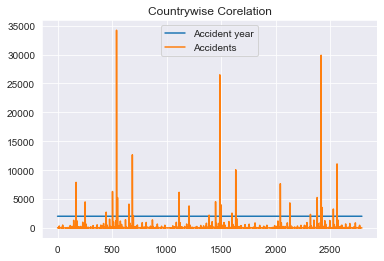

In [100]:
Countries.plot()
plt.title("Countrywise Corelation")
plt.show()

In [55]:
Regions.corr()

,Accident year,Accidents
Accident year,1.00000,-0.00921
Accidents,-0.00921,1.00000


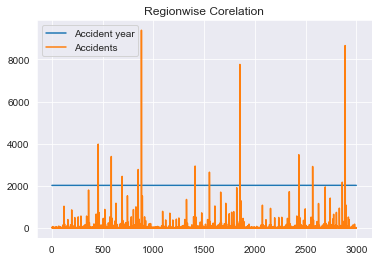

In [101]:
Regions.plot()
plt.title("Regionwise Corelation")
plt.show()

### Analysis & Visualization

In [79]:
# Groupby function used on Accident severity to show the total count
g1 = df1.groupby(['Accident severity']).size();
g1

Accident severity
Fatal       302
Serious     941
Slight     1549
dtype: int64

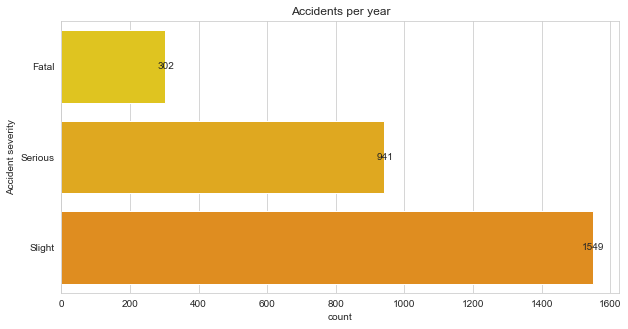

In [180]:
#Bar plot shows total number of Accidents based on Severity
plt.figure(figsize=(10,5))
plt.title("Accidents per year")
plt.ylabel("Number of Severe Accidents")
sns.set_palette("autumn_r")
ax= sns.countplot(data=Countries, y="Accident severity")
for p in ax.patches: 
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

In [102]:
#Accident count across each Region
g2 = Regions.groupby(['Region']).size();
g2

Region
East Midlands                573
London                      1037
North West                   725
Yorkshire and the Humber     665
dtype: int64

<AxesSubplot:title={'center':'Accident Count'}, xlabel='Region'>

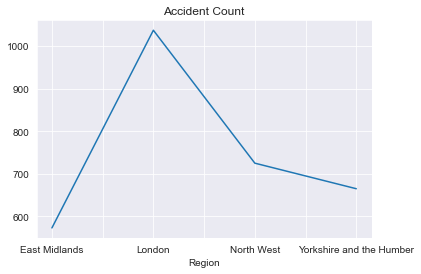

In [103]:
##Line graph shows Accident count based on Region
p2 = g2.plot(kind='line', title='Accident Count',x='Region')
p2

In [145]:
#Accidents across each country
Accidents = Countries.groupby(['Country']).size(); 
Accidents

Country
England     1803
Scotland     555
Wales        434
dtype: int64

<AxesSubplot:title={'center':'Overall Accidental Analysis '}, xlabel='Country', ylabel='Total Accidents'>

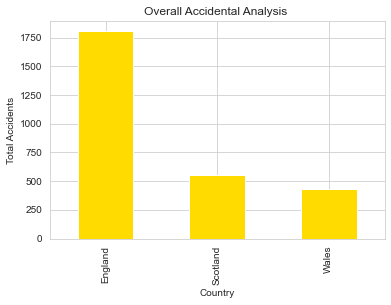

In [159]:
#Bar graph shows country by number of accidents
Accidents[:3].plot(kind = 'bar' , ylabel='Total Accidents', title='Overall Accidental Analysis ') 

In [104]:
#Count of each Weather Conditions causing Accidents
Weather = Countries.groupby(["Weather condition"])["Weather condition"].count().reset_index(name="count")
Weather

,Weather condition,count
0,Fine + high winds,224
1,Fine no high winds,841
2,Fog or mist,150
3,Other,271
4,Raining + high winds,257
5,Raining no high winds,566
6,Snowing + high winds,51
7,Snowing no high winds,136
8,Unknown,296


<AxesSubplot:title={'center':'Analysis of weather conditions causing accidents'}, xlabel='Weather condition', ylabel='Total Accidents'>

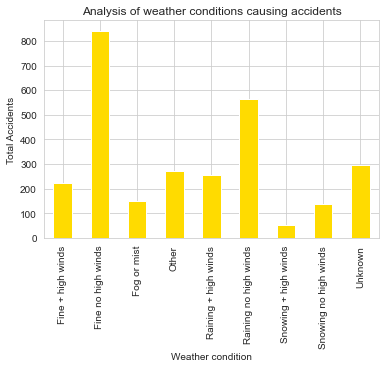

In [170]:
#Graph represents Weather condition analysis
Weather[:9].plot(kind = 'bar' , ylabel='Total Accidents', title='Analysis of weather conditions causing accidents') 

In [182]:
#On-site conditions analysis- Also shows total None & Unknown values
Road = Regions.groupby(["Special conditions at site"])["Special conditions at site"].count().reset_index(name="count")
Road

,Special conditions at site,count
0,Auto signal part defective,57
1,Auto traffic signal - out,175
2,Mud,138
3,None,1390
4,Oil or diesel,141
5,Road sign or marking defective or obscured,136
6,Road surface defective,165
7,Roadworks,333
8,Unknown,257


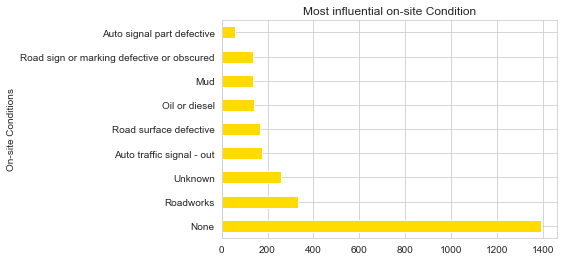

In [181]:
#Bar graph representing various categories of Weather Conditions causing Accidents
Regions['Special conditions at site'].value_counts(normalize=False).plot.barh()
plt.title("Most influential on-site Condition")
plt.ylabel("On-site Conditions")
plt.show()